# PMF, CDF, Joint Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Seyed Mani hosseini

*SID:* 810102552

The objective of this notebook is to understand the concepts of PMF and CDF and joint distribution.

In [21]:
import simpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Parameters

In [22]:
num_counters = 1
arrival_rate = 5  # customers per minute
service_rate = 6  # customers per minute
simulation_time = 10000  # minutes

## Simulation

In [23]:
def simulate_queue_system():
    """
    Simulates a queue system with customers arriving at service counters, waiting for service, and being served.

    This function defines the customer behavior and the setup of the simulation environment. It initializes the simulation environment, sets up the service counters, and continuously generates customer arrivals based on specified arrival and service rates. The function runs the simulation until the specified simulation time and returns the recorded wait times, arrival times, and service times of the customers.

    Returns:
        tuple: A tuple containing three lists - wait_times, arrival_times, and service_times, which record the respective times for each customer in the simulation.
    """

    def customer(
        env: simpy.Environment,
        name: str,
        counter: simpy.Resource,
        service_time: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Simulates a customer arriving at a service counter, waiting for service, and then being served.

        Args:
            env (simpy.Environment): The simulation environment.
            name (str): The name of the customer.
            counter (simpy.Resource): The service counter resource.
            service_time (float): The time it takes to serve the customer.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Process: The process of the customer being served.
        """
        arrival_time = env.now
        arrival_times.append(arrival_time)
        with counter.request() as req:
            yield req
            yield env.timeout(service_time)
            service_times.append(service_time)
            wait_time = env.now - arrival_time
            wait_times.append(wait_time)

    def setup(
        env: simpy.Environment,
        num_counters: int,
        arrival_rate: float,
        service_rate: float,
        wait_times: list,
        arrival_times: list,
        service_times: list,
    ):
        """
        Sets up the simulation environment with a specified number of service counters and customer arrival and service rates.

        Args:
            env (simpy.Environment): The simulation environment.
            num_counters (int): The number of service counters available.
            arrival_rate (float): The rate at which customers arrive.
            service_rate (float): The rate at which customers are served.
            wait_times (list): A list to record the wait times of customers.
            arrival_times (list): A list to record the arrival times of customers.
            service_times (list): A list to record the service times of customers.

        Yields:
            simpy.events.Timeout: The timeout event for the next customer arrival.
        """
        counter = simpy.Resource(env, num_counters)
        while True:
            yield env.timeout(np.random.exponential(1 / arrival_rate))
            service_time = np.random.exponential(1 / service_rate)
            env.process(
                customer(
                    env,
                    "Customer",
                    counter,
                    service_time,
                    wait_times,
                    arrival_times,
                    service_times,
                )
            )

    while True:
        env = simpy.Environment()
        wait_times = []
        arrival_times = []
        service_times = []
        env.process(
            setup(
                env,
                num_counters,
                arrival_rate,
                service_rate,
                wait_times,
                arrival_times,
                service_times,
            )
        )
        env.run(until=simulation_time)

        if len(wait_times) == len(arrival_times) == len(service_times):
            return wait_times, arrival_times, service_times
        
wait_times, arrival_times, service_times = simulate_queue_system()

## Plot the RVs Distributions
basically what i understood from kde is that it is a curve which represents the density or pdf of the distribution

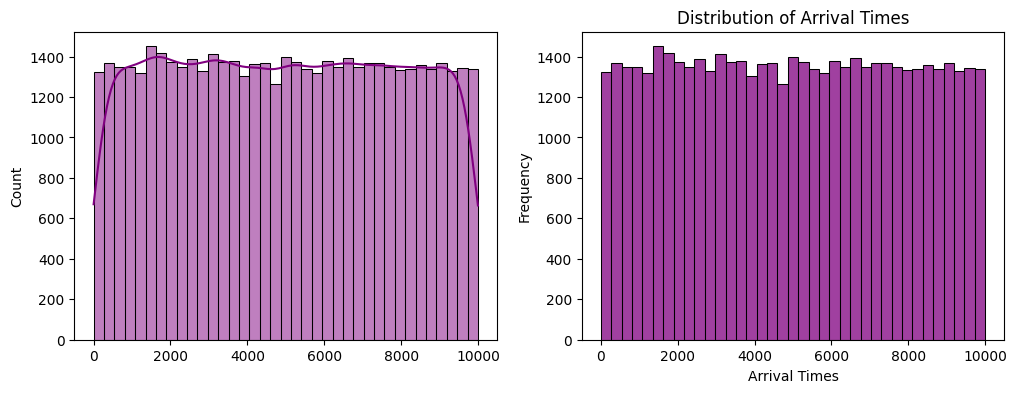

In [24]:
######################  TODO  ########################
# Distribution of Arrival Times
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(arrival_times, kde=True,color="purple")
plt.subplot(1,2,2)
sns.histplot(arrival_times, kde=False,color="purple")
plt.title('Distribution of Arrival Times') 
plt.xlabel('Arrival Times') 
plt.ylabel('Frequency') 
plt.show()
######################  TODO  ########################

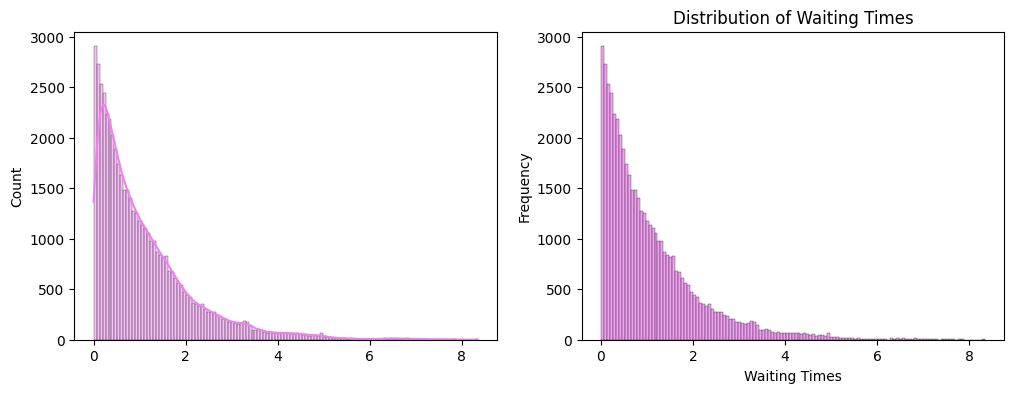

In [25]:
######################  TODO  ########################
# Distribution of Waiting Times
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(wait_times, kde=True,color="violet")
plt.subplot(1,2,2)
sns.histplot(wait_times, kde=False,color="violet")
plt.title('Distribution of Waiting Times') 
plt.xlabel('Waiting Times') 
plt.ylabel('Frequency') 
plt.show()
######################  TODO  ########################

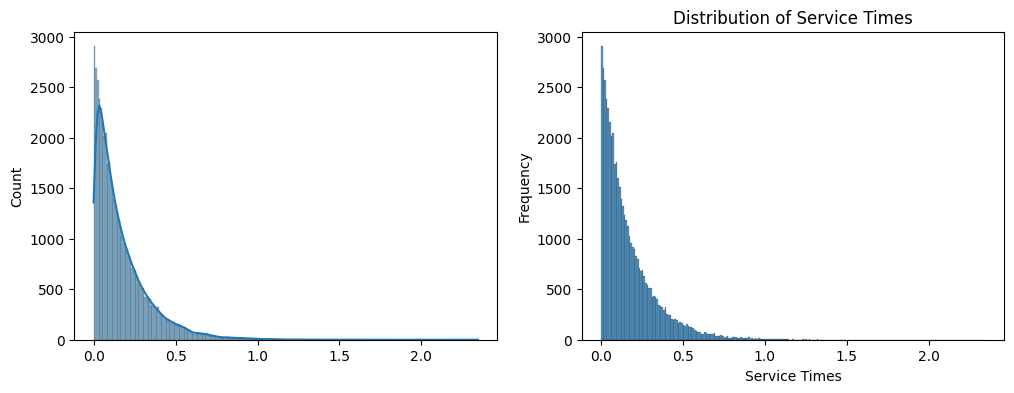

In [31]:
######################  TODO  ########################
# Distribution of Service Times
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(service_times, kde=True)
plt.subplot(1,2,2)
sns.histplot(service_times, kde=False)
plt.title('Distribution of Service Times') 
plt.xlabel('Service Times') 
plt.ylabel('Frequency') 
plt.show()
######################  TODO  ########################

## Plot the Joint Distributions

**Note:** Use `sns.jointplot` to plot the joint distributions

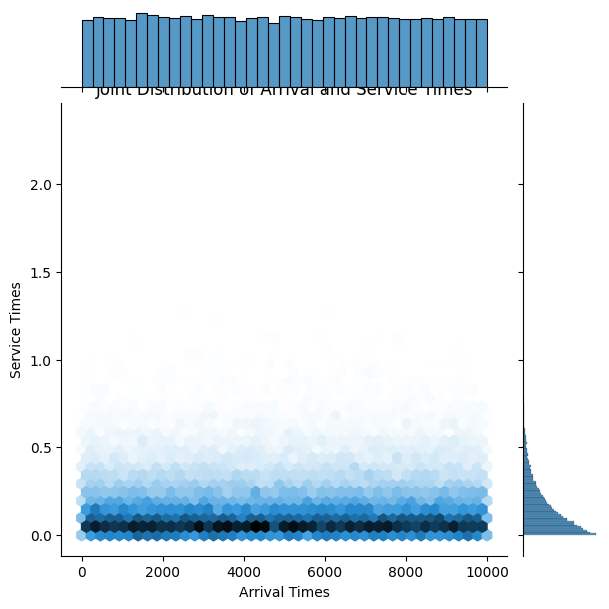

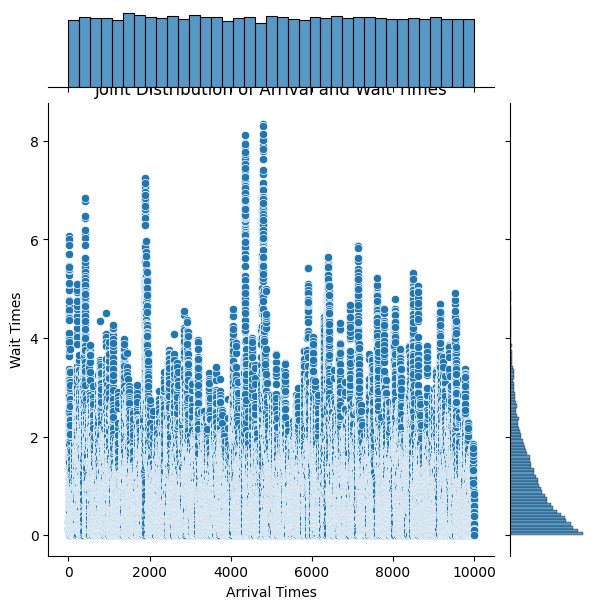

In [27]:
######################  TODO  ########################
# Joint Distribution of Arrival and Service Times
sns.jointplot(x=arrival_times,y=service_times,kind="hex")
plt.title('Joint Distribution of Arrival and Service Times') 
plt.xlabel('Arrival Times') 
plt.ylabel('Service Times') 
plt.show()
sns.jointplot(x=arrival_times,y=wait_times,kind="scatter")
plt.title('Joint Distribution of Arrival and Wait Times') 
plt.xlabel('Arrival Times') 
plt.ylabel('Wait Times') 
plt.show()
######################  TODO  ########################

## Analysis of Joint Distributions
first graph shows that arrival time and service time have a very low correlation meaning regardless of when a person arrives the time a counter spendss to do the service is almost the same, the second one shows that arrival time and wait time also have a low correlation(it has a higher one compared to fis one beacause each person in queue might be dependan on others but person who gives service is completely independent of queue)

## Scatter Plot and Correlation
since correlation of arrival time and watiting time is low that means they are not related to each other

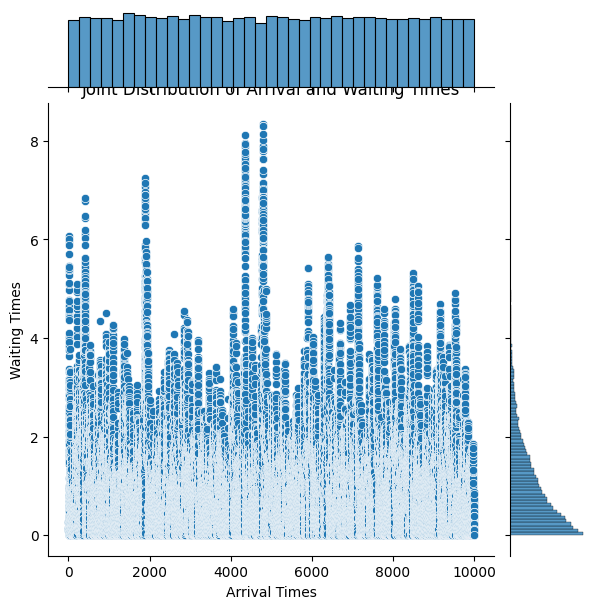

correlation is -0.0018912200097520157


In [28]:
######################  TODO  ########################
# Scatter Plot of Arrival and Waiting Times
sns.jointplot(x=arrival_times,y=wait_times,kind="scatter")
plt.title('Joint Distribution of Arrival and Waiting Times') 
plt.xlabel('Arrival Times') 
plt.ylabel('Waiting Times') 
plt.show()
correlation = np.corrcoef(arrival_times, wait_times)[1,0]
print(f'correlation is {correlation}')
######################  TODO  ########################

## Calculating `total_times`
> X ~ Exp(lambda)\
> Y ~ Exp(lambda)\
> Z = X + Y\
The sum of two independent exponential random variables with the same rate parameter is a Gamma distribution with shape parameter(2)
 and one scale Z = X + Y => fz(Z) = (lambda ^2) * (e ^ (-lambda * z)) * z. 
.

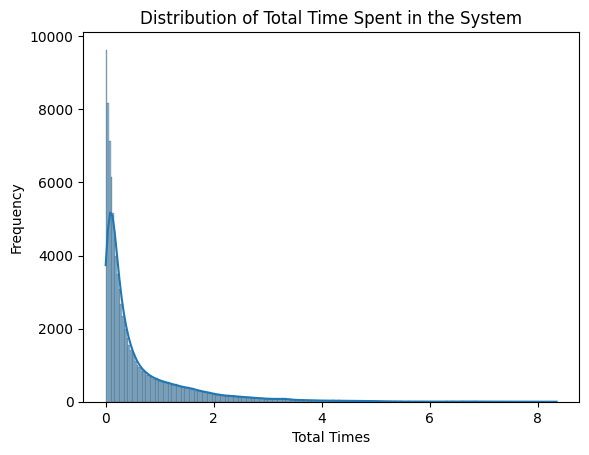

In [29]:
######################  TODO  ########################
# Distribution of Total Time Spent in the System
total_times = wait_times+service_times
sns.histplot(total_times, kde=True) 
plt.title('Distribution of Total Time Spent in the System') 
plt.xlabel('Total Times') 
plt.ylabel('Frequency') 
plt.show()
######################  TODO  ########################

## Conditional Wait Times

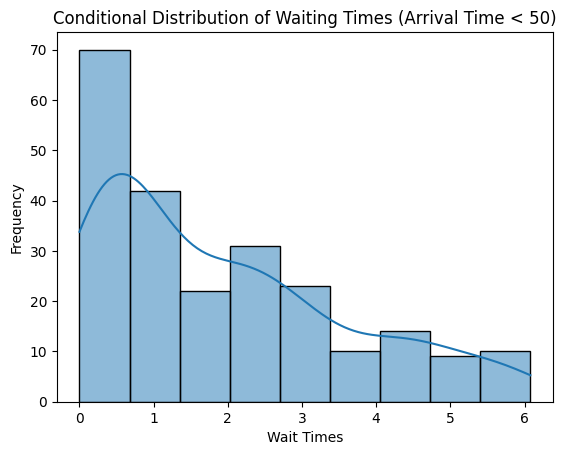

In [30]:
######################  TODO  ########################
# Conditional Distribution of Waiting Times (Arrival Time < 50)

filtered_arrival_times=[a for a in arrival_times if a<50]
filtered_wait_times=wait_times[:len(filtered_arrival_times)]
filtered_service_times=service_times[:len(filtered_arrival_times)]
sns.histplot(filtered_wait_times, kde=True) 
plt.title('Conditional Distribution of Waiting Times (Arrival Time < 50)')
plt.xlabel('Wait Times') 
plt.ylabel('Frequency')
plt.show()
######################  TODO  ########################s